# Project 1

AIM: To analyze and detect fraud credit card transactions using data analysis and machine learning techniques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we have imported all this library for data processing and see the statistic and understand dataset properly  

## Objectives
- Understand the structure and features of the dataset
- Perform exploratory data analysis (EDA) to identify trends/patterns
- Handle class imbalance (fraud vs. non-fraud)
- Build and evaluate a classification model to detect fraud


In [19]:
## Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
# Display first 5 rows to understand the structure
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Dimension of our dataset
df.shape

(284807, 31)

##"df.shape" is use to see the dimension of my data, to see how many columns and row are present in my dataset

In [20]:
#count how many null value are present in each features
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


we check for null values present in my dataset becoz null values can indicate incomplete or corrupted data. Understanding their presence helps assess how clean or reliable your data is.

to count how many null value are present we use
#"isna().sum"

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


| Statistic | Meaning                                                        |
| --------- | -------------------------------------------------------------- |
| **count** | Number of non-null (non-missing) values                        |
| **mean**  | Arithmetic mean (average) of the values                        |
| **std**   | Standard deviation (spread of the data)                        |
| **min**   | Minimum value                                                  |
| **25%**   | 1st quartile (25th percentile) — lower bound of the middle 50% |
| **50%**   | 2nd quartile (50th percentile or median)                       |
| **75%**   | 3rd quartile (75th percentile) — upper bound of the middle 50% |
| **max**   | Maximum value                                                  |


#this show meaning of all term that use in calculating statistic of or dataset



In [21]:
# counting how many 'fraud' and 'not fraud' transaction present in our 'class' column
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df['Class'] = df['Class'].replace({0:'Not Fraud', 1:'Fraud'})

#by doing this we change all "0" value to 'Not Fraud'
#and changing "1" value to 'Fraud'

#this will help us to see what our model had predict in good way

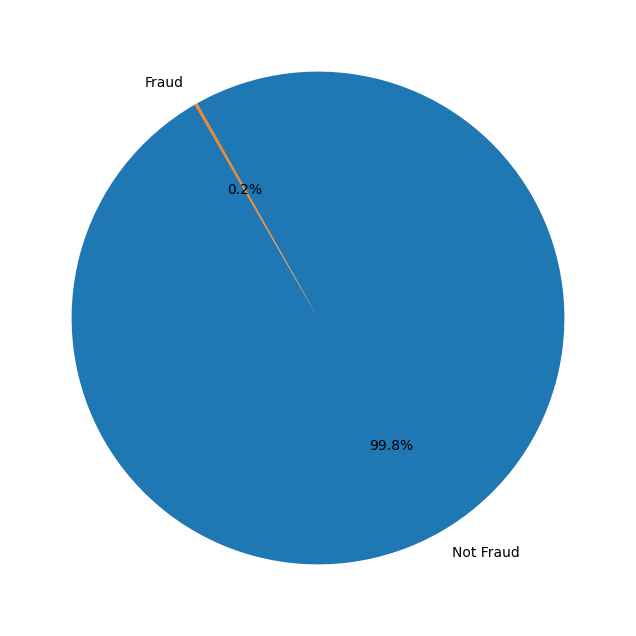

In [ ]:
#presenting fraud and not fraud in pie chart.
fraud = df['Class'].value_counts()
label = ['Not Fraud', 'Fraud']
plt.figure(figsize=(10,8))
plt.pie(fraud, labels=label, autopct='%1.1f%%', startangle=120)
plt.show()

In [ ]:
#we are dividing our dataset in independent and dependent variable
x = df.drop(columns='Class', axis=1)
y = df['Class']

# X: matrix of input features (independent variables)

# y: target labels (dependent variable)

#we are removing label from dataset by using .drop in our 'x'

In [ ]:
#spliting our dataset in 80:20 for training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

# test_size=0.2	20% of the data is used for testing, and 80% for training
# random_state=7	Ensures reproducibility — you'll get the same split every time you run the code

#Training Set (x_train, y_train): Used by the model to learn patterns

#Testing Set (x_test, y_test): Used to evaluate how well the model performs on unseen data

#This prevents overfitting, where a model performs well on training data but fails on real-world data.


In [ ]:
#This helps confirm that your data is properly split before training your model.
len(x_train), len(x_test)

(227845, 56962)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Step 1: Create a scaler object
sc = StandardScaler()
# Step 2: Fit to training data and transform it
x_train_sc = sc.fit_transform(x_train)
# Step 3: Transform test data using the same scaler
x_test_sc = sc.transform(x_test)

#You're scaling your data so that all input features contribute equally during model training, which often improves accuracy and convergence speed.

#.fit_transform(x_train)	Calculates mean and std on training data, then scales
#.transform(x_test)	Scales test data using the same mean and std from training set



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
#Create a logistic regression model object.
lr = LogisticRegression()
#Train the model using the standardized training data (x_train_sc) and the labels (y_train).
lr.fit(x_train_sc, y_train)
#Predict the labels (fraud or not) for the test data.
y_pred = lr.predict(x_test_sc)
#Calculate and print the accuracy of your model — how many predictions were correct.
lr_score = accuracy_score(y_test, y_pred)
print(lr_score)


0.9990344440153085


# Logistic Regression is a good baseline for binary classification (fraud vs. non-fraud).

In [ ]:
confusion_matrix(y_test, y_pred)

array([[   56,    44],
       [   11, 56851]])

| Term                    | Meaning                                    |
| ----------------------- | ------------------------------------------ |
| **TN (True Negative)**  | Non-fraud correctly predicted as non-fraud |
| **FP (False Positive)** | Non-fraud wrongly predicted as fraud       |
| **FN (False Negative)** | Fraud wrongly predicted as non-fraud       |
| **TP (True Positive)**  | Fraud correctly predicted as fraud         |


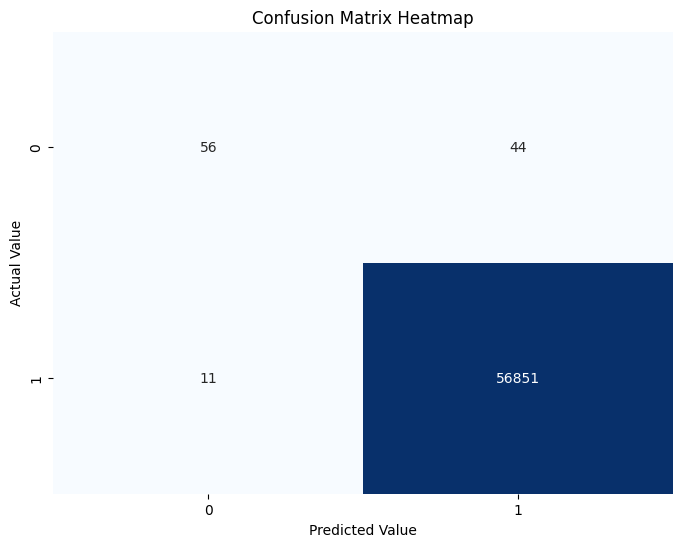

In [ ]:
#heatmap of confusion matrix to visualise better
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Confusion Matrix Heatmap')
plt.show()

#This plot helps you visually identify:

- How many fraud cases were correctly detected

- How many were missed

- Whether your model is biased toward predicting non-fraud